In [5]:
import pandas as pd
import numpy as np 
import altair as alt 


## Load all the data in that has been cleaned 


In [6]:
ice_ero_regions = pd.read_csv("ICE-Enforcement_and_Removal_Operations_Area_2011-2020.csv")
ice_ero_regions["year"] = pd.to_datetime(ice_ero_regions["year"],format='%Y')
ice_ero_regions_total = ice_ero_regions[ice_ero_regions['ICE_Enforcement_Removal_Area'] == "Total administrative arrests"]
ice_ero_regions_by_region = ice_ero_regions[ice_ero_regions['ICE_Enforcement_Removal_Area'] != "Total administrative arrests"]
# ice_ero_regions_total.head(2)

In [7]:
country_immigration = pd.read_csv("fy2020_Country_immigration .csv")
country_immigration["year"] = pd.to_datetime(country_immigration["year"],format='%Y')
# by_country_immigration['total_year'] = by_country_immigration['total_year'].astype(str).astype(int)
# country_immigration['country '].unique()
total_country_immigration = country_immigration[country_immigration['country'] == 'Total']
# total_country_immigration
by_country_immigration = country_immigration[country_immigration['country'] != "Total"]
# by_country_immigration
# country_immigration.head(2)

In [8]:
border_patrol_Sectors = pd.read_csv("Border_partol_ Sectors_2011-2020.csv")
border_patrol_Sectors["year"] = pd.to_datetime(border_patrol_Sectors["year"],format='%Y')
border_patrol_Sectors.head(2)

# Split to two different dataframes, one with total apprehensions and the other by secotor
# border_patrol_Sectors['Sectors'].unique()
total_sectors = ['Total Apprehensions','Southwest sectors', 'Other sectors']
total_border_patrol_Sectors = border_patrol_Sectors[border_patrol_Sectors['Sectors'] == 'Total Apprehensions']
# total_border_patrol_Sectors
total_southwest_border_patrol_Sectors = border_patrol_Sectors[border_patrol_Sectors['Sectors'] == 'Southwest sectors']
# total_southwest_border_patrol_Sectors
total_other_border_patrol_Sectors = border_patrol_Sectors[border_patrol_Sectors['Sectors'] == 'Other sectors']
# total_other_border_patrol_Sectors
by_individual_border_patrol_Sectors = border_patrol_Sectors[~border_patrol_Sectors['Sectors'].isin(total_sectors)]
# by_individual_border_patrol_Sectors

In [9]:
Ice_jurisdiction_removals = pd.read_csv("Jurisdiction_ICE_2011-2020.csv")
Ice_jurisdiction_removals["year"] = pd.to_datetime(Ice_jurisdiction_removals["year"],format='%Y')
# Ice_jurisdiction_removals.head(2)
total_Ice_jurisdiction_removals = Ice_jurisdiction_removals[Ice_jurisdiction_removals['jurisdiction'] == 'Total administrative arrests']
Ice_jurisdiction_removals_office_area = Ice_jurisdiction_removals[Ice_jurisdiction_removals['jurisdiction'] != 'Total administrative arrests']
# Ice_jurisdiction_removals_office_area


In [10]:
by_DHS_program = pd.read_csv("By Program_2011-2020.csv")
by_DHS_program["year"] = pd.to_datetime(by_DHS_program["year"],format='%Y')
total_by_DHS_program = by_DHS_program[by_DHS_program['Program'] == 'Total']
by_DHS_program_year = by_DHS_program[by_DHS_program['Program'] != 'Total']
# total_by_DHS_program.head(2)

In [11]:
region_immigration = pd.read_csv("Region_year_undoc.csv")
region_immigration["Year"] = pd.to_datetime(region_immigration["Year"],format='%Y')
total_region_immigration = region_immigration[region_immigration['Region'] == 'Total ']
# total_region_immigration
by_region_immigration = region_immigration[region_immigration['Region'] != 'Total ']
# by_region_immigration
# region_immigration.head(2)

In [12]:
whole_immigration = pd.read_csv("Year_Apprehensions .csv")
whole_immigration["Year"] = pd.to_datetime(whole_immigration["Year"],format='%Y')
# whole_immigration.head(2)


# Overview 

NONCITIZENS APPREHENDED: FISCAL YEARS 1925 TO 2020

1. Includes the 15 months from July 1, 1975 to September 30, 1976 because the end date of fiscal years was changed from June 30 to September 30.
2. Beginning in 2008, data include all administrative arrests conducted by ICE Enforcement and Removal Operations (ERO).
3. Beginning in 2009, data include administrative arrests conducted by ICE ERO and administrative arrests conducted under the 287(g) program.
4. The counting methodology for administrative arrests by ICE ERO was revised to align with ICE ERO reporting for 2016; for earlier years only one administrative arrest could be counted for the same person on the same day.
5. U.S. Border Patrol (USBP) data for 2020 include USBP encounters resulting in expulsions on public health grounds under U.S. Code Title 42 in response to the COVID-19 pandemic.
    - Note: Data refer to USBP apprehensions and encounters and ICE administrative arrests. Prior to 1952, data refer to USBP apprehensions. 
    - Source: U.S. Department of Homeland Security.
    

NONCITIZENS APPREHENDED BY PROGRAM AND BORDER PATROL SECTOR, INVESTIGATIONS SPECIAL AGENT IN CHARGE (SAC) JURISDICTION, AND AREA OF RESPONSIBILITY: FISCAL YEARS 2011 TO 2020

- Contains some X Not applicable.							
- Contains D Data withheld to limit disclosure.							
1. The counting methodology for administrative arrests by ICE ERO was revised to align with ICE ERO reporting for 2016; for earlier years only one administrative arrest could be counted for the same person on the same day.		
2. USBP data for 2020 include USBP encounters resulting in expulsions on public health grounds under U.S. Code Title 42 in response to the COVID-19 pandemic.							
3. Historical figures for ICE ERO administrative arrests may differ from those published by ICE due to updates to previously published numbers.							
    - Note: USBP data are current as of October 2020. ICE ERO data are current as of October 2020. ICE HSI data are current as of October 2020.							
    - Source: U.S. Department of Homeland Security.		
    


Noncitizens Aprehended - 
- custody - CBP:  Noncitizens apprehended by CBP and detained in CBP short-term custody facilities or processing centers (up to 72 hours) for purposes of case processing and disposition, pending transfer to another agency, release, or additional or other actions. [Source](https://www.dhs.gov/immigration-statistics/reporting-terminology-definitions)
    


In [13]:
base = alt.Chart(whole_immigration).mark_line().encode(x="Year",y="Number").properties(width=900)
presidents = pd.DataFrame([
    {
        "start": "1923-08-02",
        "end": "1929-03-03",
        "president": "Coolidge"
    },
    {
        "start": "1929-03-04",
        "end": "1933-03-03",
        "president": "Hoover"
    },
    {
        "start": "1933-03-04",
        "end": "1945-04-11",
        "president": "FDR"
    },
    {
        "start": "1945-04-12",
        "end": "1953-01-19",
        "president": "Truman"
    },
    {
        "start": "1953-01-20",
        "end": "1961-01-19",
        "president": "Eisenhower"
    },
   {
        "start": "1961-01-20",
        "end": "1963-11-21",
        "president": "JFK"
    },
   {
        "start": "1963-11-22",
        "end": "1969-01-19",
        "president": "LBJ"
    },
    {
        "start": "1969-01-20",
        "end": "1974-08-08",
        "president": "Nixon"
    },
    {
        "start": "1974-08-09",
        "end": "1977-01-19",
        "president": "Ford"
    },
    {
        "start": "1977-01-20",
        "end": "1981-01-19",
        "president": "Clinton"
    },
    {
        "start": "1981-01-20",
        "end": "1989-01-19",
        "president": "Regan"
    },
    {
        "start": "1989-01-20",
        "end": "1993-01-19",
        "president": "GHWB"
    },
    {
        "start": "1993-01-20",
        "end": "2001-01-01",
        "president": "Clinton"
    },
    {
        "start": "2001-01-02",
        "end": "2009-01-19",
        "president": "Bush"
    },
    {
        "start": "2009-01-20",
        "end": "2016-01-19",
        "president": "Obama"
    },
    {
        "start": "2016-01-20",
        "end": "2021-01-19",
        "president": "Trump"
    },
    {
        "start": "2021-01-20",
        "end": "2024-01-19",
        "president": "Biden"
    }
    
])
rule = alt.Chart(presidents).mark_rule(
    color="black",
    strokeWidth=2
).encode(
    x='end:T'
)

text = alt.Chart(presidents).mark_text(
    align='left',
    baseline='middle',
    dx=2,
    dy=-145,
    size=8
).encode(
    x='start:T',
    x2='end:T',
    text='president',
    color=alt.value('#000000')
)


base.properties(title="NONCITIZENS APPREHENDED: FISCAL YEARS 1925 TO 2022") + rule + text

alt.LayerChart(...)

In [14]:
selection = alt.selection(type="multi",fields=["Program"], bind="legend")
alt.Chart(by_DHS_program_year).mark_line().encode(
    x ="year",
    y= "Total",
    color = alt.Color("Program", scale=alt.Scale(scheme="spectral")),
    tooltip = ["Program","Total"],opacity = alt.condition(selection, alt.value(1),alt.value(.2))).add_selection(selection).properties(title='NONCITIZENS APPREHENDED BY PROGRAM AND BORDER PATROL SECTOR, INVESTIGATIONS SPECIAL AGENT IN CHARGE (SAC) JURISDICTION, AND AREA OF RESPONSIBILITY: FISCAL YEARS 2011 TO 2020 ',width=900)

alt.Chart(...)

In [15]:
total = alt.Chart(total_border_patrol_Sectors).mark_line().encode(x="year",y="Total").properties(width=900)
southwest = alt.Chart(total_southwest_border_patrol_Sectors).mark_line().encode(x="year",y="Total",color=alt.value("red")).properties(width=900)
other_sectors = alt.Chart(total_other_border_patrol_Sectors).mark_line().encode(x="year",y="Total",color=alt.value("#FFAA00")).properties(width=900)
total +southwest + other_sectors.properties(title='Total Vs. Southwest border Patrol Vs. Other sectors')

alt.LayerChart(...)

# Country and Region Break down 

NONCITIZENS APPREHENDED BY REGION AND COUNTRY OF NATIONALITY: FISCAL YEARS 2011 TO 2020

- Some daata D Data withheld to limit disclosure. 
- "-" Represents zero.
1. The counting methodology for administrative arrests by ICE Enforcement and Removal Operations (ERO) was revised to align with ICE ERO reporting for 2016; for earlier years only one administrative arrest could be counted for the same person on the same day.
2. U.S. Border Patrol (USBP) data for 2020 include USBP encounters resulting in expulsions on public health grounds under U.S. Code Title 42 in response to the COVID-19 pandemic.
3. Includes countries with fewer than 10 noncitizens apprehended or encountered per year.
    - Note: USBP data are current as of October 2020. ICE ERO data are current as of October 2020. ICE Homeland Security Investigations (HSI) data are current as of October 2020.
    - Source: U.S. Department of Homeland Security.

In [16]:
alt.Chart(total_country_immigration).mark_line().encode(
    x ="year",
    y= "total_year",
    tooltip = ["country","total_year"],).properties(title='NONCITIZENS APPREHENDED BY REGION AND COUNTRY OF NATIONALITY: FISCAL YEARS 2011 TO 2020',width=900)

alt.Chart(...)

In [17]:
selection = alt.selection(type='multi',fields = ["year"])

base = alt.Chart(by_country_immigration).properties(width = 500, height = 250)

overview = alt.Chart(by_country_immigration).mark_bar().encode(
    x = "year",
    y= "total_year",
    color = alt.condition(selection, alt.value("orange"), alt.value("lightgrey"))
).add_selection(selection).properties(height=300)

detail = base.mark_bar(width=10).encode(
    x="country",
    y= "total_year"
).transform_filter(selection).properties(height=300,width=1200)

overview.properties(title='NONCITIZENS APPREHENDED BY YEAR: FISCAL YEARS 2011 TO 2020') | detail.properties(title='NONCITIZENS APPREHENDED BY COUNTRY OF NATIONALITY BY YEAR')

alt.HConcatChart(...)

In [18]:
selection = alt.selection(type='multi',fields = ["region"])
base = alt.Chart(by_country_immigration).properties(width = 500, height = 250)

overview = alt.Chart(by_country_immigration).mark_bar().encode(
    x = "region",
    y= "total_year",
    color = alt.condition(selection, alt.value("orange"), alt.value("lightgrey"))
).add_selection(selection).properties(height=300, width=400)

detail = base.mark_bar(width=10).encode(
    x="country",
    y= "total_year"
).transform_filter(selection).properties(height=300, width=1000)


overview.properties(title='NONCITIZENS APPREHENDED BY REGION FISCAL YEARS 2011 TO 2020') | detail.properties(title='NONCITIZENS APPREHENDED BY COUNTRY OF NATIONALITY: FISCAL YEARS 2011 TO 2020') 

alt.HConcatChart(...)

In [19]:
def region_visuals(region):
    region_immigration  = by_country_immigration[by_country_immigration['region']== region]
    
    selection = alt.selection(type="multi",fields=["country"], bind="legend")
    chart = alt.Chart(region_immigration).mark_circle().encode(
        x ="year",
        y= "total_year",
        color = alt.Color("country", scale=alt.Scale(scheme="rainbow")),
        tooltip = ["country","total_year"],opacity = alt.condition(selection, alt.value(1),alt.value(.2)),
    ).add_selection(selection).properties(title=region+" NONCITIZENS APPREHENDED BY COUNTRY OF NATIONALITY: FISCAL YEARS 2011 TO 2020",height=500, width=500)
    return chart

In [20]:
# List to choose from ['Asia', 'Europe', 'Africa', 'North America', 'South America','Oceania', 'Unknown']
region_visuals('North America')

alt.Chart(...)

In [21]:
selection = alt.selection(type="multi",fields=["region"], bind="legend")

alt.Chart(by_country_immigration).mark_circle().encode(
    x ="year",
    y= "total_year",
    color = alt.Color("region", scale=alt.Scale(scheme="rainbow")),
    tooltip = ["country","total_year"],
    opacity = alt.condition(selection, alt.value(1),alt.value(.2)),
).add_selection(selection).properties(title='NONCITIZENS APPREHENDED BY Region & BY COUNTRY OF NATIONALITY: FISCAL YEARS 2011 TO 2020',height=500, width=500)

alt.Chart(...)

In [22]:
selection = alt.selection(type="multi",fields=["Region"], bind="legend")
alt.Chart(by_region_immigration).mark_line().encode(
    x ="Year",
    y= "Total",
    color = alt.Color("Region", scale=alt.Scale(scheme="rainbow")),
    tooltip = ["Region","Total"],opacity = alt.condition(selection, alt.value(1),alt.value(.2))).add_selection(selection).properties(title='NONCITIZENS APPREHENDED BY Region: FISCAL YEARS 2011 TO 2020',width=900)

alt.Chart(...)

In [23]:
north_america_only = by_country_immigration[by_country_immigration["region"]== "North America"]
everywhere_else = by_country_immigration[by_country_immigration["region"]!= "North America"]

In [24]:
selection = alt.selection(type="multi",fields=["region"], bind="legend")

alt.Chart(north_america_only).mark_circle().encode(
    x ="year",
    y= "country",
    size = "total_year",
    color = alt.Color("region", scale=alt.Scale(scheme="rainbow")),
    tooltip = ["country","total_year"],
    opacity = alt.condition(selection, alt.value(1),alt.value(.2)),
).add_selection(selection).properties(title='North America NONCITIZENS APPREHENDED BY COUNTRY OF NATIONALITY: FISCAL YEARS 2011 TO 2020',height=500, width=500)

alt.Chart(...)

In [25]:
selection = alt.selection(type="multi",fields=["region"], bind="legend")

alt.Chart(everywhere_else).mark_circle().encode(
    x ="year",
    y= "country",
    size = "total_year",
    color = alt.Color("region", scale=alt.Scale(scheme="rainbow")),
    tooltip = ["country","total_year"],
    opacity = alt.condition(selection, alt.value(1),alt.value(.2)),
).add_selection(selection).properties(title='Everyother NONCITIZENS APPREHENDED BY COUNTRY OF NATIONALITY: FISCAL YEARS 2011 TO 2020',height=1200, width=500)

alt.Chart(...)

# ICE ERO 
#### Definition of ICE Enforcement and Removal Operations (ERO): 
Removes noncitizens from the U.S. who are subject to a final order of removal or have been granted voluntary departure. ERO's Removal Division coordinates, manages, and facilitates efforts to successfully remove noncitizens from the United States.

NONCITIZENS APPREHENDED BY PROGRAM AND BORDER PATROL SECTOR, INVESTIGATIONS SPECIAL AGENT IN CHARGE (SAC) JURISDICTION, AND AREA OF RESPONSIBILITY: FISCAL YEARS 2011 TO 2020

- Contains some X Not applicable.							
- Contains D Data withheld to limit disclosure.							
1. The counting methodology for administrative arrests by ICE ERO was revised to align with ICE ERO reporting for 2016; for earlier years only one administrative arrest could be counted for the same person on the same day.		
2. USBP data for 2020 include USBP encounters resulting in expulsions on public health grounds under U.S. Code Title 42 in response to the COVID-19 pandemic.							
3. Historical figures for ICE ERO administrative arrests may differ from those published by ICE due to updates to previously published numbers.							
    - Note: USBP data are current as of October 2020. ICE ERO data are current as of October 2020. ICE HSI data are current as of October 2020.							
    - Source: U.S. Department of Homeland Security.		
    

In [47]:
sum(ice_ero_regions_total['Total'])

1800972

In [26]:
alt.Chart(ice_ero_regions_total).mark_line().encode(
    x ="year",
    y= "Total",
    tooltip = ["ICE_Enforcement_Removal_Area","Total"],).properties(title='ICE ERO by year 2011-2020',width=900)

alt.Chart(...)

In [27]:
selection = alt.selection(type='multi',fields = ["year"])

base = alt.Chart(ice_ero_regions_by_region).properties(width = 500, height = 250)

overview = alt.Chart(ice_ero_regions_by_region).mark_bar().encode(
    x = "year",
    y= "Total",
    color = alt.condition(selection, alt.value("orange"), alt.value("lightgrey"))
).add_selection(selection).properties(height=250)

detail = base.mark_bar(width=10).encode(
    x="ICE_Enforcement_Removal_Area",
    y= "Total"
).transform_filter(selection).properties(height=250)

overview.properties(title='Yearly Totals of Ice ERO Areas') | detail.properties(title='Totals of that year by ICE ERO Areas')

alt.HConcatChart(...)

In [28]:
selection = alt.selection(type="multi",fields=["ICE_Enforcement_Removal_Area"], bind="legend")
alt.Chart(ice_ero_regions_by_region).mark_line().encode(
    x ="year",
    y= "Total",
    color = alt.Color("ICE_Enforcement_Removal_Area", scale=alt.Scale(scheme="rainbow")),
    tooltip = ["ICE_Enforcement_Removal_Area","Total"],opacity = alt.condition(selection, alt.value(1),alt.value(.2))).add_selection(selection).properties(title='ICE ERO by sectors 2011-2020',height = 500, width=1000)

alt.Chart(...)

# ICE Homeland Security Investigations (HSI)
HSI conduct criminal and civil investigations involving national security threats, terrorism, drug smuggling, child exploitation, human trafficking, illegal arms export, financial crimes, identity fraud, benefit fraud, commercial fraud and more. In this case it is geared towards NONCITIZENS APPREHENDEd, resulting in the explorotion of them out of the country 

In [29]:
alt.Chart(total_Ice_jurisdiction_removals).mark_line().encode(
    x ="year",
    y= "Total",
#     color = alt.Color("Program", scale=alt.Scale(scheme="spectral")),
    tooltip = ["jurisdiction","Total"]).properties(title='ICE HSI Operations 2011-2020',width=900)

alt.Chart(...)

In [30]:
selection = alt.selection(type='multi',fields = ["year"])

base = alt.Chart(Ice_jurisdiction_removals_office_area).properties(width = 500, height = 250)

overview = alt.Chart(Ice_jurisdiction_removals_office_area).mark_bar().encode(
    x = "year",
    y= "Total",
    color = alt.condition(selection, alt.value("orange"), alt.value("lightgrey"))
).add_selection(selection).properties(height=250)

detail = base.mark_bar(width=10).encode(
    x="jurisdiction",
    y= "Total"
).transform_filter(selection).properties(height=250)

overview.properties(title='Yearly Totals of ICE HSI Jurisdiction') | detail.properties(title='Totals of that year by ICE HSI Jurisdiction')

alt.HConcatChart(...)

In [31]:
selection = alt.selection(type="multi",fields=["jurisdiction"], bind="legend")
alt.Chart(Ice_jurisdiction_removals_office_area).mark_line().encode(
    x ="year",
    y= "Total",
    color = alt.Color("jurisdiction", scale=alt.Scale(scheme="rainbow")),
    tooltip = ["jurisdiction","Total"],opacity = alt.condition(selection, alt.value(1),alt.value(.2))).add_selection(selection).properties(title='ICE HSI by sectors 2011-2020',height = 500, width=1000)

alt.Chart(...)

# Southern Border 
U.S. Border Patrol (USBP): detect, prevent, and apprehend terrorists, undocumented noncitizens, smugglers of noncitizens and illegal narcotics at or near the 6,000 miles of Mexican and Canadian international land borders and 2,000 miles of coastal borders using surveillance from covert positions.

In [32]:
selection = alt.selection(type='multi',fields = ["year"])

base = alt.Chart(by_individual_border_patrol_Sectors).properties(width = 500, height = 250)

overview = alt.Chart(by_individual_border_patrol_Sectors).mark_bar().encode(
    x = "year",
    y= "Total",
    color = alt.condition(selection, alt.value("orange"), alt.value("lightgrey"))
).add_selection(selection).properties(height=250)

detail = base.mark_bar(width=10).encode(
    x="Sectors",
    y= "Total"
).transform_filter(selection).properties(height=250)

overview.properties(title='Yearly Totals of Southern Border Patrol Sectors') | detail.properties(title='Totals of that year by Southern Border Patrol Sectors')

alt.HConcatChart(...)

In [33]:
selection = alt.selection(type="multi",fields=["Sectors"], bind="legend")
alt.Chart(by_individual_border_patrol_Sectors).mark_line().encode(
    x ="year",
    y= "Total",
    color = alt.Color("Sectors", scale=alt.Scale(scheme="rainbow")),
    tooltip = ["Sectors","Total"],opacity = alt.condition(selection, alt.value(1),alt.value(.2))).add_selection(selection).properties(title='Southern Border by sectors 2011-2020',height = 500, width=1000)

alt.Chart(...)

# Title 8/Title 42 current problems with immigration 

Title 42 - 
- Since March 20, 2020, public health order expelling asylumn seekers back over the border even with a case for asylum. Over 1.8 million expulsions under Title 42 have been carried out since the pandemic began. However, nearly half of those expulsions were of the same people being apprehended and expelled back to Mexico multiple times. This is because Title 42 has led to a significant increase in repeat crossings at the border. Half of all single adults from Mexico, Guatemala, Honduras, and El Salvador who have been expelled to Mexico under Title 42 have been apprehended crossing the border again. As a result, Title 42 has significantly increased overall border crossings. In fact, 1 in 3 apprehensions since Title 42 expulsions began have been of a person on at least their second attempt to cross the border. [Source](https://www.americanimmigrationcouncil.org/research/guide-title-42-expulsions-border)

Key question 
- Expulsions under Title 42 are not based on immigration status and are tracked separately from immigration enforcement actions, such as apprehension or inadmissibility, that are regularly reported by CBP.

Title 8 
- Under Title 8, those who attempt to enter the United States without authorization, and who are unable to establish a legal basis to remain in the United States (such as a valid asylum claim), are subject to additional long-term consequences beyond removal from the United States, including bars to future immigration benefits. 
    - Title 8 Inadmissible: Any alien who, by fraud or willfully misrepresenting a material fact, seeks to procure (or has sought to procure or has procured) a visa, other documentation, or admission into the United States or other benefit provided under this chapter is inadmissible.

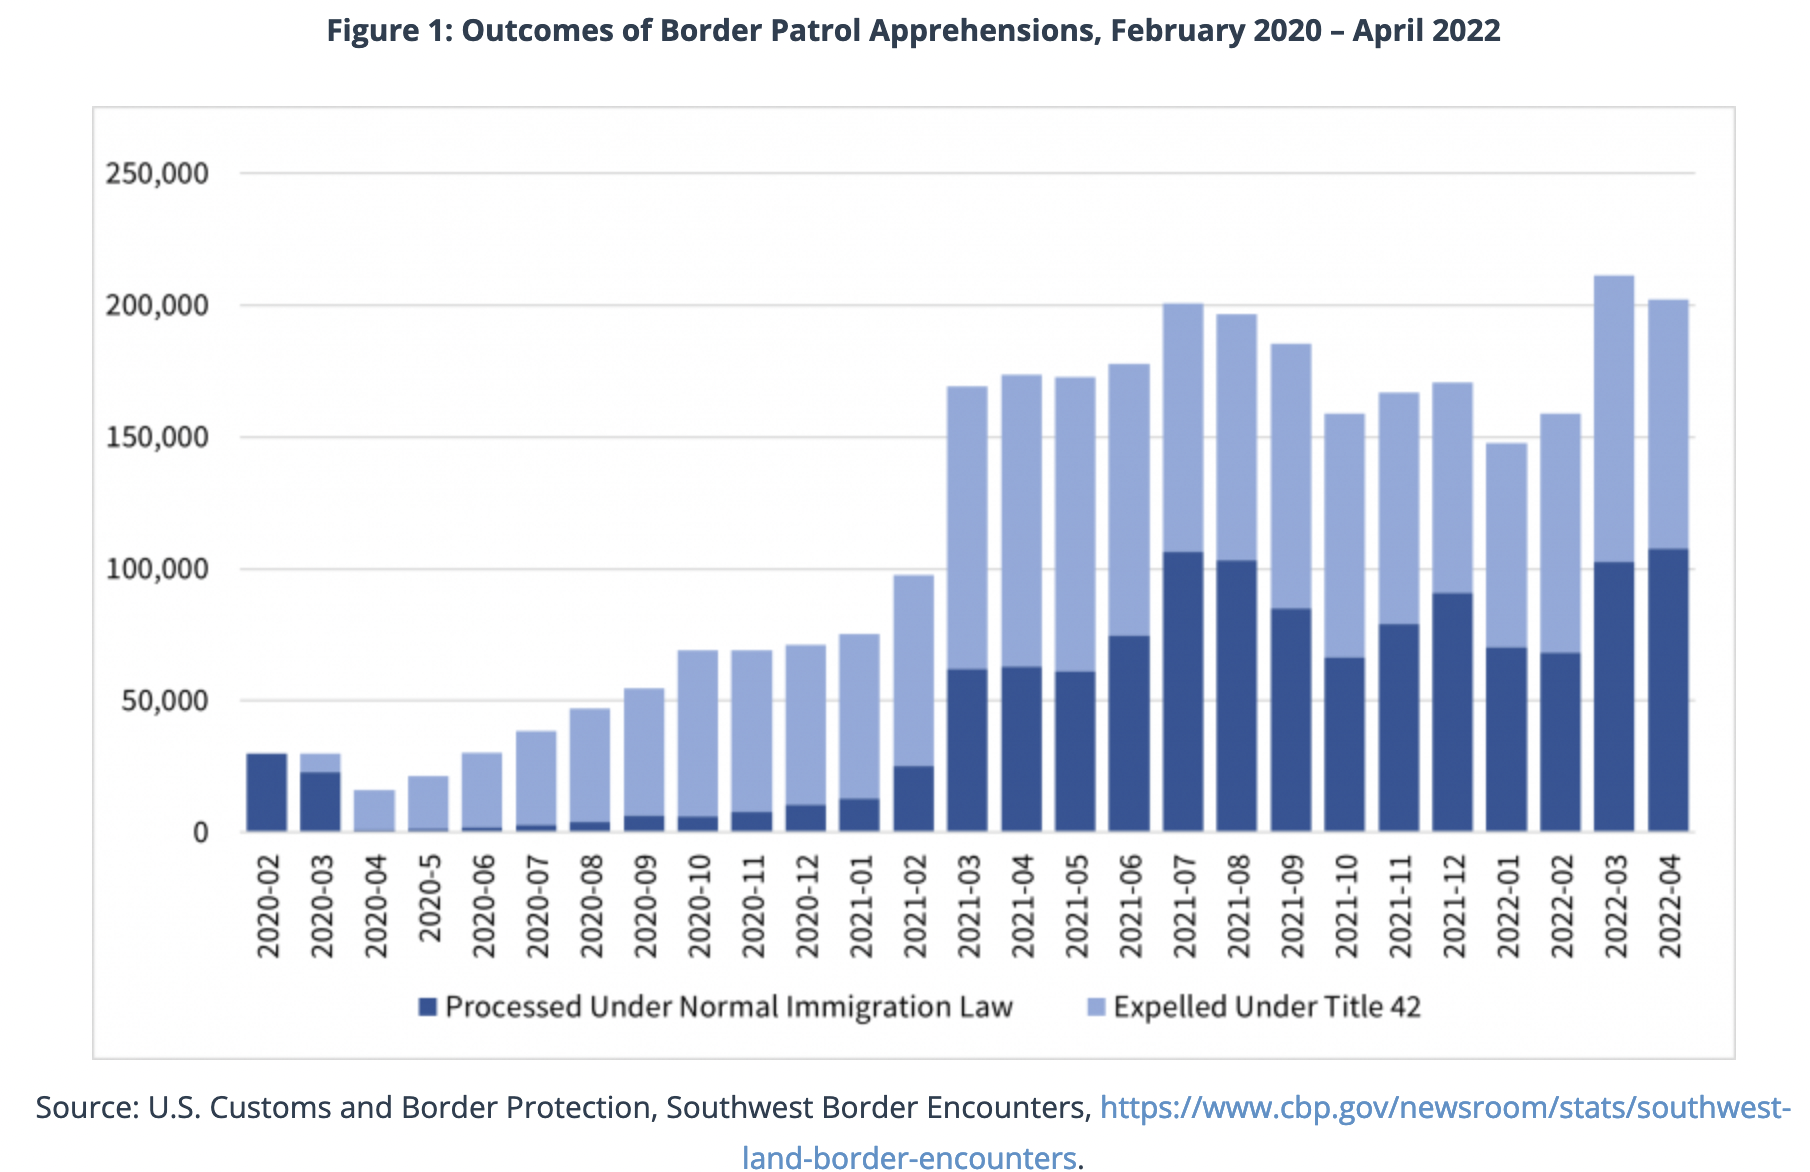

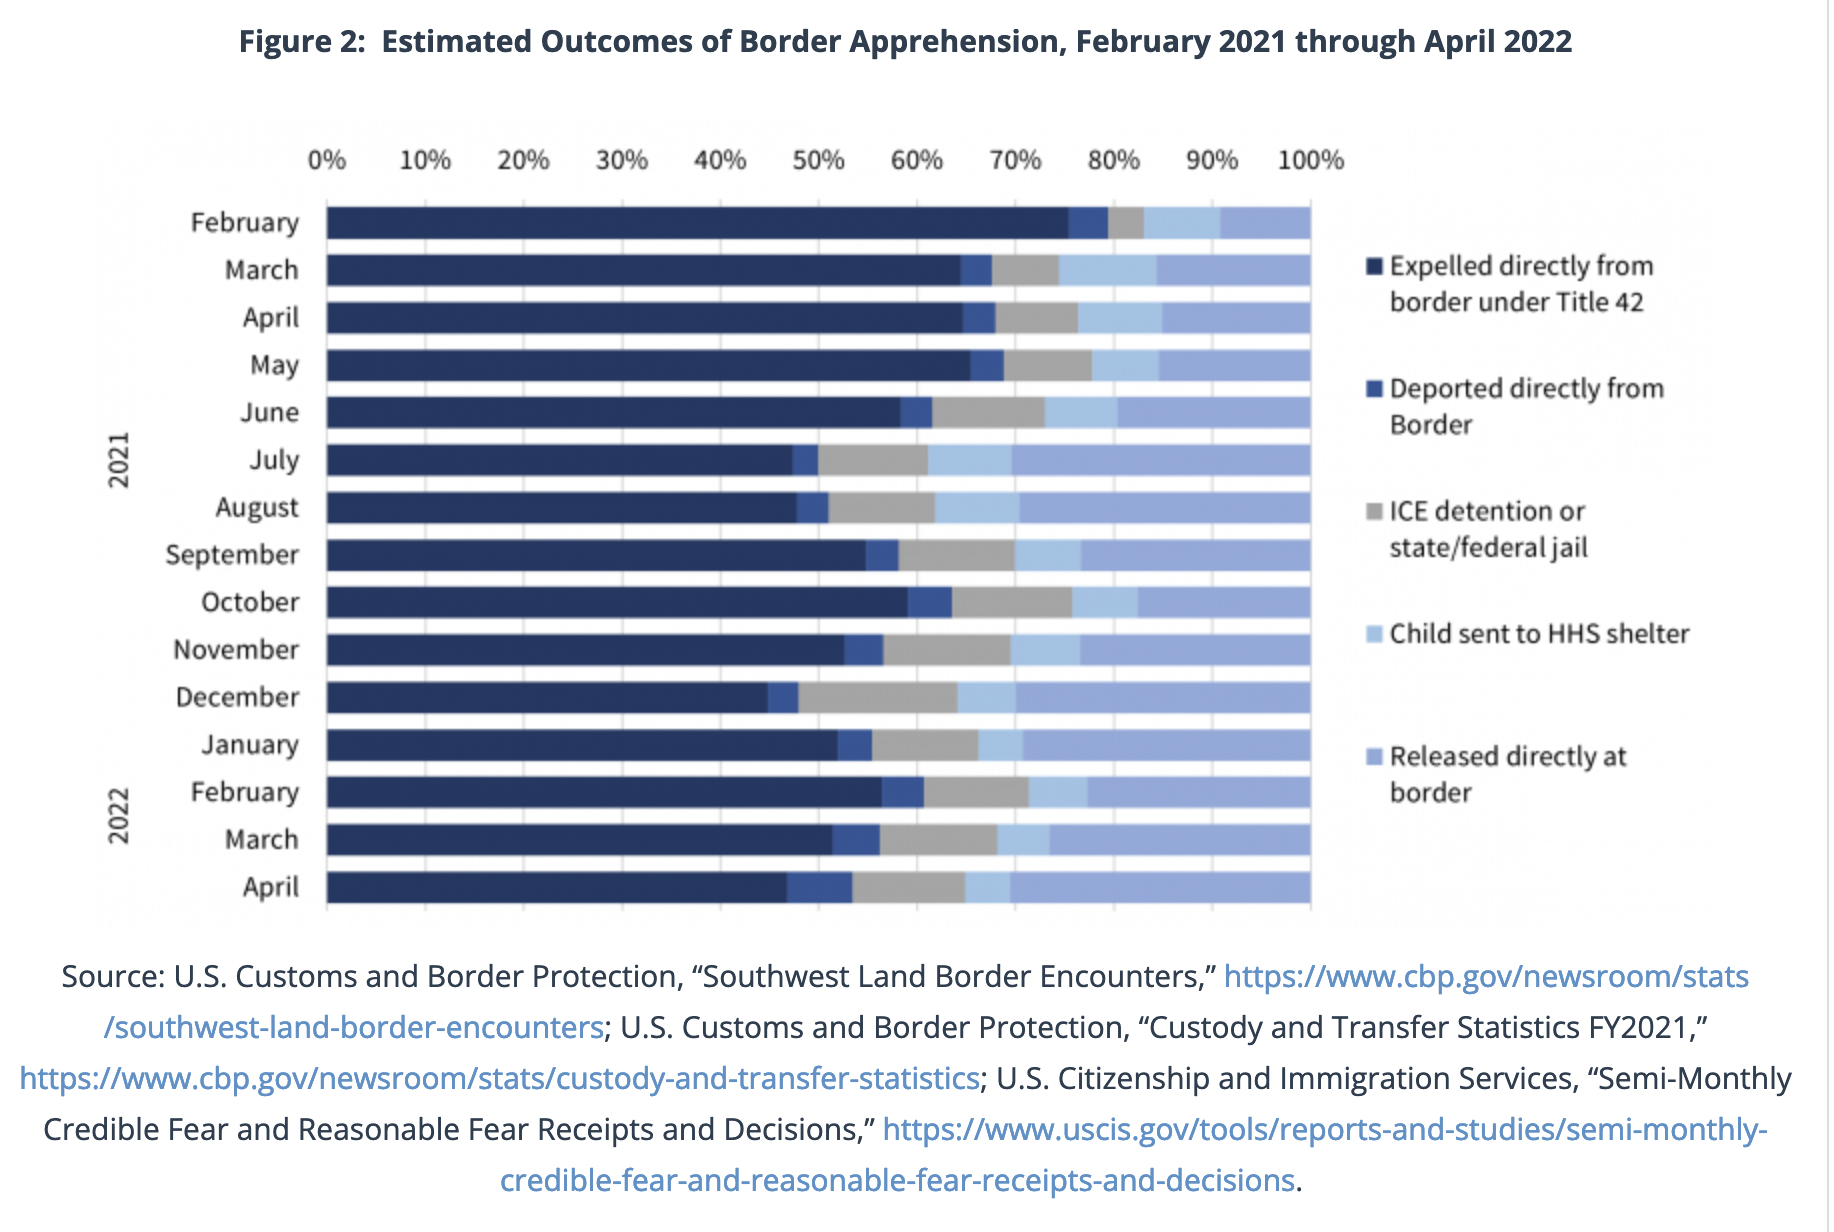

In [34]:
title_8_42_df = pd.read_csv("Title_8_42_2022.csv")
title_8_42_df["Month"] = pd.to_datetime(title_8_42_df["Month"])
title_8_42_df.columns

Index(['Month', 'NothernLandBorder/Title8', 'NothernLandBorder/Title42',
       'NothernLandBorderTotal', 'SouthwestLandBorder/Title8',
       'SouthwestLandBorder/Title42', 'SouthwestLandBorder/Total',
       'LandBorderTotal/Title8', 'LandBorderTotal/Title42',
       'USBPTotalLandBorder'],
      dtype='object')

In [35]:
alt.Chart(title_8_42_df).mark_line().transform_fold(
    fold=['SouthwestLandBorder/Title8', 'SouthwestLandBorder/Title42'], 
    as_=['variable', 'value']
).encode(
    x='Month:T',
    y='max(value):Q',
    color='variable:N'
).properties(title='Southern Border Title 8 and Title 42 March 2020-August 2022',height = 500, width=700)

alt.Chart(...)

In [36]:
alt.Chart(title_8_42_df).mark_line().encode(
    x ="Month",
    y= "SouthwestLandBorder/Total",
    tooltip = ["Month","SouthwestLandBorder/Total"])

alt.Chart(...)

# Deportations by ICE 
1. Removals are the compulsory and confirmed movement of an inadmissible or deportable alien out of the United States based on an order of removal. An alien who is removed has administrative or criminal consequences placed on subsequent reentry owing to the fact of the removal.
2. Returns are the confirmed movement of an inadmissible or deportable alien out of the United States not based on an order of removal.

In [37]:
ice_deportations = pd.read_csv("ICE_deportation_data.csv")
ice_deportations["Year"] = pd.to_datetime(ice_deportations["Year"],format='%Y')
ice_deportations.head()

Year  Removals   Returns
0 2019-01-01    359885  171445.0
1 2018-01-01    328716  159940.0
2 2017-01-01    287093  100695.0
3 2016-01-01    331717  106458.0
4 2015-01-01    325328  129661.0

In [60]:
text2 = alt.Chart(presidents).mark_text(
    align='left',
    baseline='middle',
    dx=2,
    dy=-145,
    size=8
).encode(
    x='start:T',
    x2='end:T',
    text='president',
    color=alt.value('#000000')
)

laws = pd.DataFrame([
  {
        "start": "1891-01-01",
        "end": "1891-12-31",
        "Law": "IA 1891"
    },{
        "start": "1917-01-01",
        "end": "1917-12-31",
        "Law": "IA 1917"
    },{
        "start": "1921-01-01",
        "end": "1921-12-31",
        "Law": "EQ Act"
    },{
        "start": "1924-01-01",
        "end": "1924-12-31",
        "Law": "NO Act"
    },{
        "start": "1952-01-01",
        "end": "1952-12-31",
        "Law": "INA 1952"
    },{
        "start": "1965-01-01",
        "end": "1965-12-31",
        "Law": "INA 1965"
    },{
        "start": "1986-01-01",
        "end": "1986-12-31",
        "Law": "IRCA"
    },{
        "start": "2002-01-01",
        "end": "2002-12-31",
        "Law": "ER"
    },{
        "start": "2006-01-01",
        "end": "2006-12-31",
        "Law": "SF"
    }]) 
rule2 = alt.Chart(laws).mark_rule(
    color="red",
    strokeWidth=2
).encode(
    x='end:T'
)
text3 = alt.Chart(laws).mark_text(
    align='left',
    baseline='middle',
    dx=8,
    dy=-120,
    size=7
).encode(
    x='start:T',
    x2='end:T',
    text='Law',
    color=alt.value('blue')
)


alt.Chart(ice_deportations).mark_line().transform_fold(
    fold=['Removals', 'Returns'], 
    as_=['variable', 'value']
).encode(
    x='Year:T',
    y='max(value):Q',
    color='variable:N'
).properties(title='ICE Deportations', width=1000) + rule + text2 +text3 +rule2

alt.LayerChart(...)